### Time Delay Embedding

In order to use supervised methods such as Randomforests, the time series data needs to be converted to time-delay embeddings. This notebook shows how to create these embedding features.

In [1]:
import pandas as pd
import os
os.chdir(os.path.expanduser(".."))
import tslib
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv("./data/daily_min_temp.csv")

In [3]:
from tslib import preprocessing

In [4]:
ts = df.Temp

In [5]:
emb = preprocessing.TimeDelayEmbedding(ts,k=30) ## we are taking a lag of 30 time periods

In [6]:
X,y = emb.fit()

In [7]:
X

array([[20.7, 17.9, 18.8, ..., 17.2, 15.5, 15.1],
       [17.9, 18.8, 14.6, ..., 15.5, 15.1, 15.4],
       [18.8, 14.6, 15.8, ..., 15.1, 15.4, 15.3],
       ...,
       [14.7, 12.7, 13.3, ..., 14.6, 14. , 13.6],
       [12.7, 13.3, 13.2, ..., 14. , 13.6, 13.5],
       [13.3, 13.2, 16.2, ..., 13.6, 13.5, 15.7]])

In [8]:
y ## 15.4 is the 30th entry in ts object

array([15.4, 15.3, 18.8, ..., 13.5, 15.7, 13. ])

In [9]:
ts.iloc[30]

15.4

In [10]:
ts

0       20.7
1       17.9
2       18.8
3       14.6
4       15.8
        ... 
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, Length: 3650, dtype: float64

In [11]:
import sklearn.ensemble as ensemble

In [12]:
m = ensemble.RandomForestRegressor()

In [13]:
m = m.fit(X,y)

In [14]:
preds = m.predict(X)

In [15]:
import matplotlib.pyplot as plt

[]

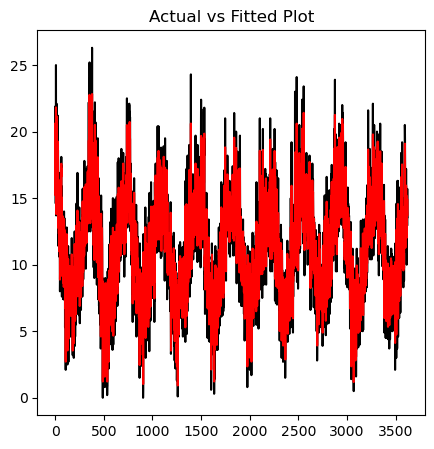

In [16]:
actual_vals=pd.Series(y)
fitted_vals=pd.Series(preds)
x_range=actual_vals.index
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(x_range,actual_vals,label='Actual values',color='black')
ax.plot(x_range,fitted_vals,label='Fitted values',color='red')
ax.set_title('Actual vs Fitted Plot')
plt.plot() 